### Contents:
    01. Importing libraries and data
    02. Data checks and preparation
    03. Data privacy issue
    04. Customer behavior in 4 regions
        a. Categorizing states into regions
        b. Analyzing region-based customer behavior
    05. Exclusion flag for low-activity customers
        a. Creating exclusion flag for low-activity customers
        b. Datatype conversion
        c. Extracting low-activity customers
        d. Saving high-activity customers as main dataframe


### 1. Importing libraries and data

In [1]:
# Importing all required libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import gc

In [2]:
# Defining the path

path = r'C:\Users\nukis\Documents\Instacart Basket Analysis'

In [3]:
# Importing the final version of the dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_cleaned2.pkl'))

In [4]:
# Command to maximize view of rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = len(df.columns)

# Stting the decimal format

pd.set_option('display.float_format', '{:,.1f}'.format)

### 2. Data checks and preparation

In [5]:
df.shape

(32404859, 33)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float32 
 6   product_id                     float32 
 7   add_to_cart_order              float32 
 8   reordered                      float32 
 9   product_name                   object  
 10  aisle_id                       int16   
 11  department_id                  int8    
 12  prices                         float32 
 13  price_range_loc                category
 14  busiest_day                    category
 15  busiest_days                   category
 16  busiest_period_of_day          category
 17  max_order                

In [7]:
# Dropping the '_merge' column

df = df.drop(columns = ['_merge'])

In [8]:
# Check the statistical measure of the dataframe

df.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_days_since_prior_order,age,dependants_number,income
count,"32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,399,732.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0","32,404,859.0"
mean,"1,710,745.5","102,937.2",17.1,2.7,13.4,9.6,"23,985.7",7.6,0.5,71.2,9.9,7.6,33.1,10.0,8.6,49.5,1.5,"99,437.7"
std,"987,298.8","59,466.1",17.5,2.1,4.2,8.6,"13,733.3",6.6,0.5,38.2,6.3,4.1,25.2,83.2,6.3,18.5,1.1,"43,057.3"
min,2.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-1.0,18.0,0.0,"25,903.0"
25%,"855,947.0","51,422.0",5.0,1.0,10.0,4.0,"13,544.0",3.0,0.0,31.0,4.0,4.2,13.0,7.4,6.0,33.0,1.0,"67,004.0"
50%,"1,711,049.0","102,616.0",11.0,3.0,13.0,7.0,"25,302.0",6.0,1.0,83.0,9.0,7.4,26.0,7.8,7.0,49.0,2.0,"96,618.0"
75%,"2,565,499.0","154,389.0",24.0,5.0,16.0,14.0,"37,947.0",11.0,1.0,107.0,16.0,11.3,47.0,8.3,12.0,65.0,3.0,"127,912.0"
max,"3,421,083.0","206,209.0",99.0,6.0,23.0,30.0,"49,688.0",145.0,1.0,134.0,21.0,25.0,99.0,"25,005.4",30.0,81.0,3.0,"593,901.0"


In [9]:
df.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,surname,gender,state,age,date_joined,dependants_number,marital_status,income
0,2539329,1,1,2,8,-1.0,196.0,1.0,0.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regulary busy days,Most orders,10,New customer,6.4,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.4,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.4,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.4,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.4,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
df.tail(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,surname,gender,state,age,date_joined,dependants_number,marital_status,income
32404854,156685,106143,26,4,23,5.0,"19,675.0",1.0,1.0,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,26,Regular customer,10.7,High spender,6.5,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,-1.0,"47,210.0",1.0,0.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regulary busy days,Most orders,4,New customer,8.1,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,"47,210.0",1.0,1.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.1,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,"47,210.0",1.0,1.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regulary busy days,Most orders,4,New customer,8.1,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404858,2922475,66343,4,1,12,30.0,"47,210.0",1.0,1.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.1,Low spender,24.5,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [11]:
# Check of random row

df.sample(n=10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,surname,gender,state,age,date_joined,dependants_number,marital_status,income
16386978,546994,8365,71,2,4,1.0,"46,020.0",4.0,1.0,Crispy Onions,89,13,2.1,Low-range product,Regularly busy,Regulary busy days,Fewest orders,99,Loyal customer,8.7,Low spender,2.0,Frequent customer,Willie,Peters,Male,Alabama,40,7/2/2019,3,married,91646
4634878,1104269,33242,31,0,10,9.0,"4,269.0",22.0,0.0,Mild Cheddar Cheese,21,16,10.8,Mid-range product,Busiest day,Busiest days,Most orders,44,Loyal customer,7.2,Low spender,6.0,Frequent customer,Stephanie,Hill,Female,South Carolina,59,2/20/2019,2,married,140565
5706216,1204492,49133,62,5,9,15.0,"36,082.0",12.0,1.0,Organic Mango,24,4,12.9,Mid-range product,Regularly busy,Regulary busy days,Most orders,68,Loyal customer,7.9,Low spender,5.0,Frequent customer,Shirley,Harrison,Female,Maine,68,1/9/2017,0,divorced/widowed,66731
11908704,3398437,140809,7,4,13,7.0,"6,452.0",23.0,0.0,Organic Berry Strawberry Flax Plus Chewy Yogur...,3,19,6.8,Mid-range product,Least busy,Slowest days,Most orders,73,Loyal customer,6.1,Low spender,5.0,Frequent customer,Willie,Peters,Male,West Virginia,39,11/16/2019,2,married,38155
1236352,688967,22386,3,1,11,3.0,"23,178.0",4.0,1.0,Pure Lemon Juice,98,7,11.0,Mid-range product,Regularly busy,Busiest days,Most orders,23,Regular customer,6.9,Low spender,5.0,Frequent customer,Justin,Hail,Male,Washington,63,4/7/2019,2,married,46549
28100016,2283901,9998,3,0,18,30.0,"43,409.0",3.0,0.0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Busiest day,Busiest days,Most orders,4,New customer,7.2,Low spender,30.0,Non-frequent customer,Earl,Flynn,Male,Alaska,41,3/18/2017,1,married,108646
29044333,1949000,72250,37,6,14,16.0,"6,052.0",11.0,1.0,Eggo Chocolate Chip Waffles,52,1,1.6,Low-range product,Regularly busy,Regulary busy days,Most orders,43,Loyal customer,123.2,High spender,9.0,Frequent customer,Nancy,Whitaker,Female,Massachusetts,59,3/30/2019,2,married,215316
31343406,196523,115503,3,1,9,28.0,"4,656.0",30.0,1.0,Raspberry Preserves,88,13,11.2,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,7.5,Low spender,28.0,Non-frequent customer,Benjamin,Cortez,Male,Pennsylvania,34,12/16/2018,1,married,96377
22612144,254632,78526,7,6,16,5.0,"15,700.0",5.0,0.0,Cheddar Cheese Nut Thins Cracker Snacks,78,19,2.3,Low-range product,Regularly busy,Regulary busy days,Most orders,15,Regular customer,7.0,Low spender,23.0,Non-frequent customer,Ms,Faulkner,Female,Mississippi,22,7/14/2018,3,married,34277
24570380,933238,34697,2,0,15,28.0,"26,116.0",6.0,1.0,Raw Nutra Kraut,110,13,1.1,Low-range product,Busiest day,Busiest days,Most orders,4,New customer,6.0,Low spender,23.0,Non-frequent customer,Joseph,Durham,Male,Kansas,67,6/26/2018,0,divorced/widowed,52883


### 3. Data privacy issue

In [13]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'median_days_since_prior_order',
       'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'dependants_number', 'marital_status', 'income'],
      dtype='object')

In [14]:
# Dropping the 'first_name' and 'surname' column

df = df.drop(columns = ['first_name', 'surname'])

### 4. Customer behavior in 4 regions

#### 4a. Categorizing states into region

In [15]:
# List of 4 regions of the United States

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [17]:
# For loop for categorizing states into 4 above regions

result = []
for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [19]:
# Function to check the list before merging it with the DataFrame

def region_category(region):
    Northeast = region.count('Northeast')
    Midwest = region.count('Midwest')
    South = region.count('South')
    West = region.count('West')
    
    print(f'South: {South}')
    print(f'West: {West}')
    print(f'Midwest: {Midwest}')
    print(f'Northeast: {Northeast}')
    print(f'Total: {Northeast + Midwest + South + West}')

In [20]:
region_category(result)

South: 10791885
West: 8292913
Midwest: 7597325
Northeast: 5722736
Total: 32404859


In [21]:
# As the total rows of 'result' corresponds to the total rows of the dataframe, it is ready to be integrated.

df['region'] = result

In [22]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'dependants_number', 'marital_status', 'income', 'region'],
      dtype='object')

#### 4b. Analyzing region-based customer behavior

In [24]:
#Crosstab of 'region' with 'spender_flag'

crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False).sort_values(by = ['High spender'], ascending=False)
new_cols = ['Low spender', 'High spender']
crosstab = crosstab[new_cols]
crosstab

spender_flag,Low spender,High spender
region,,
South,10582194,209691
West,8132559,160354
Midwest,7441350,155975
Northeast,5614511,108225


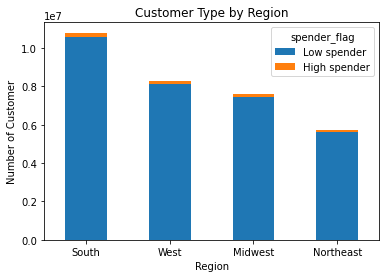

In [25]:
bar_spender_flag = crosstab.plot(kind='bar', rot=0, stacked=True)

plt.title('Customer Type by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customer')
plt.show();

As depicted by above bar charts, we could clearly see that both high spender and low spender customers are located in the South region followed by West, Midwest and Northeast. However, as region is a group based on location, the number of states in each group may not be equal. For this purpose, let's see how many states in each regions.

Reminder: Spender flag is calculated for each 'user_id' based on the average price across all their orders.
< 10 USD is 'Low spender', >= 10 USD is 'High spender'

In [28]:
# Checking number of states in each region using groupby() and agg() function

df.groupby('region').agg({'state': pd.Series.nunique}).sort_values(by = 'state', ascending=False)

,state
region,
South,17
West,13
Midwest,12
Northeast,9


In [30]:
# Checking number of customers in each region using groupby() and agg() function

cust_per_region = df.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False).reset_index()
cust_per_region.rename(columns = {'user_id': 'number_of_customers'}, inplace = True)
cust_per_region

,region,number_of_customers
0,South,68737
1,West,52565
2,Midwest,48519
3,Northeast,36388


In [31]:
# Calculating total number of customers in all region

total_cust = df.groupby('region')['user_id'].nunique().sum()
print(f'Total number of customers: {total_cust}')

Total number of customers: 206209


In [32]:
# Confirming if the total number of customer is true. Here, the latest 'user_id' is equal to the number of customer.

df['user_id'].max()

206209

It can be clearly seen that South has the most states and therefore, also the most customers. However, in order to see how the spending behavior in the individual basis, it can be seen in the table below.

In [34]:
cust_behavior = df.groupby('region').agg({'user_id': 'nunique', 'prices': 'mean' }).round(decimals = 2).sort_values(by = 'user_id', ascending=False).reset_index()
cust_behavior.rename(columns = {'user_id': 'number_of_customers', 'prices': 'avg_order_price_spent'}, inplace = True)
cust_behavior

,region,number_of_customers,avg_order_price_spent
0,South,68737,7.8
1,West,52565,7.8
2,Midwest,48519,7.8
3,Northeast,36388,7.8


The table above shows that despite having the highest number of customers, customer in the South region does not place high value of order in average. It turns out that customer in the Midwest region places high value orders in average, despite having less number of customer.

### 5. Exclusion flag for low-activity customers

#### 5a. Creating exclusion flag for low-activity customers (customers with less than 5 orders)

In [36]:
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'High-activity customer'
df.loc[df['max_order'] < 5, 'customer_activity'] = 'Low-activity customer'

In [38]:
# Checking the number of 'High-activity customer' and 'Low-activity customer'

df['customer_activity'].value_counts()

High-activity customer    30964564
Low-activity customer      1440295
Name: customer_activity, dtype: int64

#### 5b. Datatype conversion

As Jupyter kept crashing, the dataframe will be resized.

In [40]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 139.07 MB
Average memory usage for int columns: 154.52 MB
Average memory usage for object columns: 1898.31 MB


In [42]:
# The biggest RAM usage is object type.
# Converting object data type to category for all columns below except 'product_name' as it has too many unique values.
# We should stick to using the category type primarily for object columns where less than 50% of the values are unique.

df_obj = df.select_dtypes(include=['object']).copy()

In [43]:
df_obj.describe()

,product_name,gender,state,date_joined,marital_status,region,customer_activity
count,32404859,32404859,32404859,32404859,32404859,32404859,32404859
unique,49661,2,51,1187,4,4,2
top,Banana,Male,Pennsylvania,7/28/2018,married,South,High-activity customer
freq,472565,16315029,667082,37813,22756753,10791885,30964564


In [45]:
# Change in datatype by downcasting loop except 'product_name'

for column in df:
    if df[column].dtype == 'float32':
        df[column] = pd.to_numeric(df[column], downcast = 'float')
    elif df[column].dtype == 'int32':
        df[column] = pd.to_numeric(df[column], downcast = 'integer')
    else:
        if df[column].dtype == 'object' and column != 'product_name':
            df[column] = df[column].astype('category') 

In [46]:
# Check again the dataframe size after compression

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float32 
 6   product_id                     float32 
 7   add_to_cart_order              float32 
 8   reordered                      float32 
 9   product_name                   object  
 10  aisle_id                       int16   
 11  department_id                  int8    
 12  prices                         float32 
 13  price_range_loc                category
 14  busiest_day                    category
 15  busiest_days                   category
 16  busiest_period_of_day          category
 17  max_order                

By using above steps, memory usage is reduced from 16.5 GB to 4.6 GB to prevent Jupyter from crashing all the time.

#### 5c. Extracting low-activity customers

In [49]:
# Extracting only the 'Low-activity customer' and resetting the index

low_act_cust = (df.loc[df['customer_activity'] == 'Low-activity customer']).reset_index()
low_act_cust = low_act_cust.drop(columns = ['index'])
low_act_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,dependants_number,marital_status,income,region,customer_activity
0,520620,120,1,3,11,-1.0,196.0,2.0,0.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,9.4,Low spender,15.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
1,3273029,120,3,2,8,19.0,196.0,2.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regulary busy days,Most orders,3,New customer,9.4,Low spender,15.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
2,520620,120,1,3,11,-1.0,"46,149.0",1.0,0.0,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,9.4,Low spender,15.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
3,3273029,120,3,2,8,19.0,"46,149.0",1.0,1.0,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Regulary busy days,Most orders,3,New customer,9.4,Low spender,15.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer
4,520620,120,1,3,11,-1.0,"26,348.0",3.0,0.0,Mixed Fruit Fruit Snacks,50,19,3.1,Low-range product,Regularly busy,Slowest days,Most orders,3,New customer,9.4,Low spender,15.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low-activity customer


In [50]:
low_act_cust.shape

(1440295, 32)

In [51]:
# Exporting the 'Low-activity customer'

low_act_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customer.pkl'))

#### 5d. Saving high-activity customers as main dataframe

In [53]:
# Deleting the 'Low-activity customer' from the main dataframe

df_high = (df.loc[df['customer_activity'] == 'High-activity customer']).reset_index()

In [55]:
df_high = df_high.drop(columns = ['index'])
df_high.shape

(30964564, 32)

In [56]:
# Ensuring the maindataframe index is correct

print(df_high.index)

RangeIndex(start=0, stop=30964564, step=1)


As the index and total number of 'High-activity customer' correspond to each other, the command and process run above were executed successfully. In case Jupyter crashes again in the future, this dataframe is to be exported.

In [57]:
# Exporting the 'High-activity customer' to avoid Jupyter from crashing

df_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_ver1.pkl'))

#### Exporting visualizations as image files

In [58]:
bar_spender_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_flag.png'))

As my Jupyter kept crashing, I divided this notebook into 2 parts. This notebook will be continued to Part1B.